In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('car.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [24]:
df.shape

(301, 9)

In [25]:
cat_feats = [c for c in df.columns if df[c].dtype == object]
cat_feats

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [26]:
for c in cat_feats:
    print(c, df[c].unique())
    

Car_Name ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'He

In [27]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [28]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [29]:
df['Age'] = df['Year'].map(lambda x: 2020 - x)

In [30]:
df.drop(['Car_Name', 'Year'], axis =1, inplace = True)

In [31]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [32]:
from sklearn.preprocessing import LabelEncoder
cat_feats = ["Fuel_Type", "Seller_Type", "Transmission"]
for c in cat_feats:
    lbl = LabelEncoder()
    lbl.fit(df[c].values)
    df[c] = lbl.transform(df[c].values)


In [33]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,0,1,0,6
1,4.75,9.54,43000,1,0,1,0,7
2,7.25,9.85,6900,2,0,1,0,3
3,2.85,4.15,5200,2,0,1,0,9
4,4.60,6.87,42450,1,0,1,0,6


In [34]:
for c in cat_feats:
    print(df[c].unique())

[2 1 0]
[0 1]
[1 0]


In [35]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
Selling_Price,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216,0.524342
Fuel_Type,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705,0.053643
Seller_Type,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269,0.039896
Transmission,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316,-0.000394
Owner,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,0.053643,0.039896,-0.000394,0.182104,1.000000


In [36]:
import seaborn as sns

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

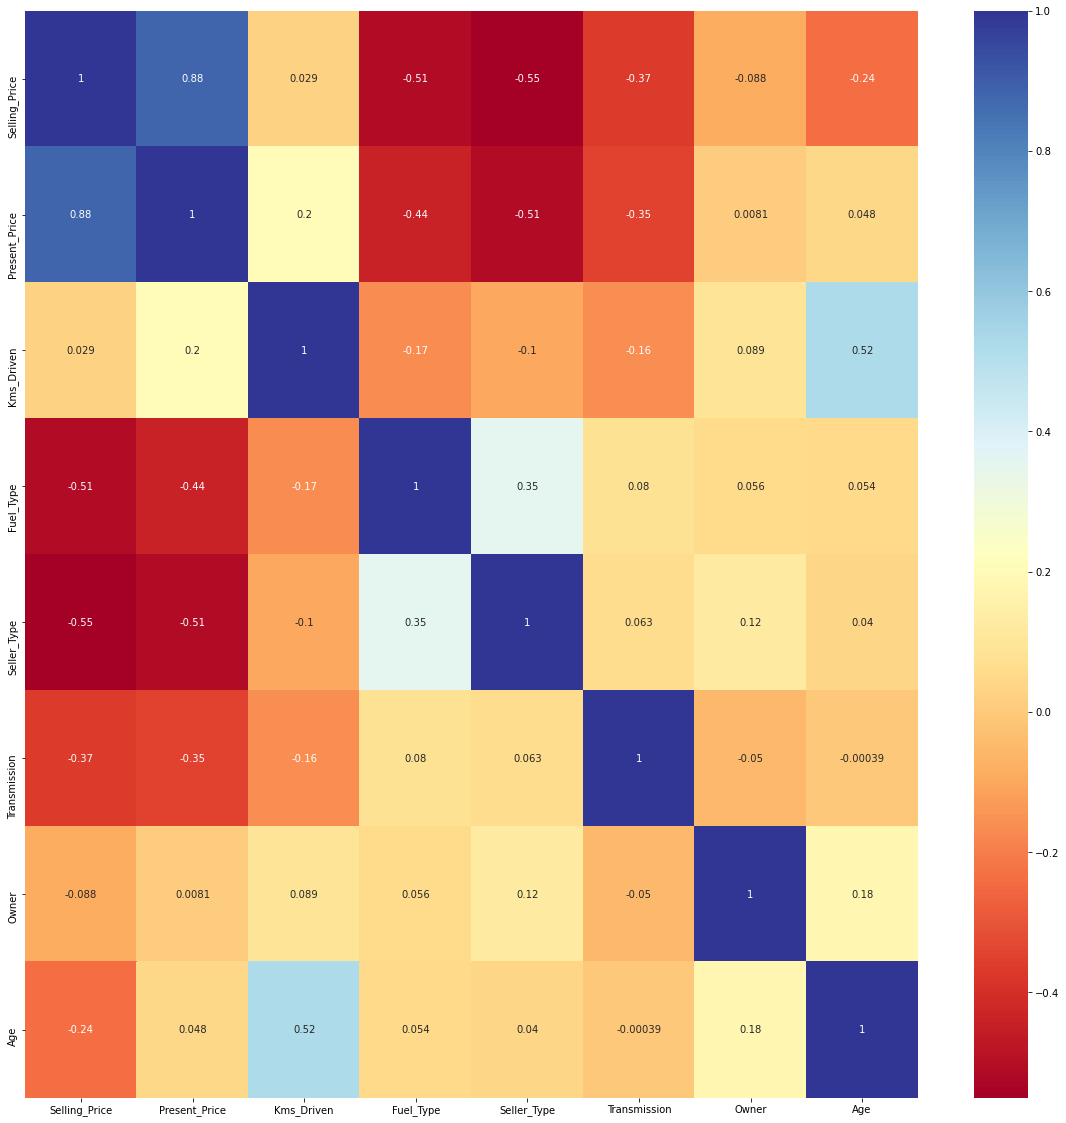

In [38]:
corrmat = df.corr()
top_corr = corrmat.index
plt.figure(figsize = (20, 20))
sns.heatmap(df[top_corr].corr(), annot = True, cmap = 'RdYlBu')


In [39]:
x = df.iloc[:,1:]
y = df.iloc[:, 0]

In [40]:
x.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,2,0,1,0,6
1,9.54,43000,1,0,1,0,7
2,9.85,6900,2,0,1,0,3
3,4.15,5200,2,0,1,0,9
4,6.87,42450,1,0,1,0,6


In [41]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [42]:
print(model.feature_importances_)

[0.42747907 0.03987423 0.13627323 0.2387552  0.07915318 0.00114322
 0.07732187]


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [44]:
x_train.shape

(240, 7)

In [54]:
x_train.columns

Index(['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Age'],
      dtype='object')

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()


In [46]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num =6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [47]:
param_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf
}

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42)

In [50]:
rf_random.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [51]:
pred = rf_random.predict(x_val)

C:\Users\AVIK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

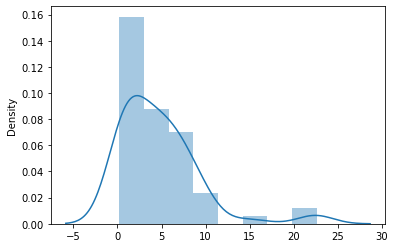

In [52]:
sns.distplot(pred)

In [53]:
import pickle
file = open('regression_model.pkl', 'wb')
pickle.dump(rf_random, file)